In [1]:
using Distributed
using SharedArrays
addprocs(11);

In [2]:
@everywhere include("inverse_prob.jl")
@everywhere using PyPlot
@everywhere using DSP
@everywhere using JLD2

In [8]:
@load "camembert_data/camembert_mode.jld2"

15-element Array{Symbol,1}:
 :c                
 :c0               
 :rho              
 :Nx               
 :Ny               
 :Nt               
 :h                
 :t                
 :dt               
 :source           
 :source_position  
 :receiver_position
 :save_ratio       
 :pml_len          
 :pml_coef         

In [4]:
@load "camembert_data/camembert_data.jld2"

2-element Array{Symbol,1}:
 :data 
 :data0

In [9]:
M = cost_matrix_1d(t,t; p=2)
reg = 1e-5
reg_m = 1e0
reg_p = 0.1
iterMax = 500;

# Functions

In [10]:
op_fn(x) = eval_fn_OT(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef, reg=reg, reg_m=reg_m, reg_p=reg_p, iterMax=iterMax)
op_grad(x) = eval_grad_OT(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef, reg=reg, reg_m=reg_m, reg_p=reg_p, iterMax=iterMax)

op_fn_l2(x) = eval_fn_l2(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef)
op_grad_l2(x) = eval_grad_l2(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef);

In [11]:
@load "ex1_ot_lbfgs_10.jld2"

2-element Array{Symbol,1}:
 :xk_ot      
 :fn_value_ot

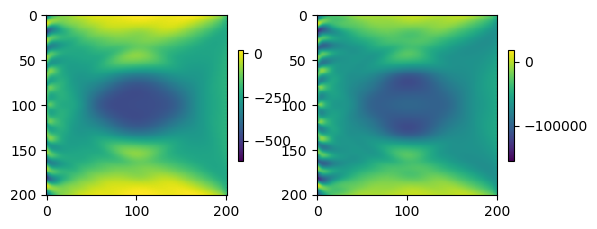

PyObject <matplotlib.colorbar.Colorbar object at 0x7f2b1e138ad0>

In [12]:
x0 = xk_ot[:];
f0, grad0 = op_grad(x0);
f0_l2, grad0_l2 = op_grad_l2(x0);
subplot(121)
imshow(reshape(grad0, Nx, Ny)); colorbar(shrink=0.3)
subplot(122)
imshow(reshape(grad0_l2, Nx, Ny)); colorbar(shrink=0.3)